In [10]:
#Panda way of dealing with dates
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
#Docs: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
train_stock_prices = pd.read_csv("../tokyo/train_files/stock_prices.csv",parse_dates=["Date"])
#pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', 500)
train_stock_prices.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   RowId             2332531 non-null  object        
 1   Date              2332531 non-null  datetime64[ns]
 2   SecuritiesCode    2332531 non-null  int64         
 3   Open              2324923 non-null  float64       
 4   High              2324923 non-null  float64       
 5   Low               2324923 non-null  float64       
 6   Close             2324923 non-null  float64       
 7   Volume            2332531 non-null  int64         
 8   AdjustmentFactor  2332531 non-null  float64       
 9   ExpectedDividend  18865 non-null    float64       
 10  SupervisionFlag   2332531 non-null  bool          
 11  Target            2332293 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 198.0+ MB


In [13]:
zero_volumes = train_stock_prices.query("Volume == 0")
zero_volumes

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
401,20170104_3540,2017-01-04,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
1753,20170104_9539,2017-01-04,9539,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.004149
2266,20170105_3540,2017-01-05,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
2511,20170105_4621,2017-01-05,4621,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
4131,20170106_3540,2017-01-06,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2330563,20211203_1787,2021-12-03,1787,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.030351
2330786,20211203_2761,2021-12-03,2761,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
2331453,20211203_5918,2021-12-03,5918,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.015625
2332336,20211203_9083,2021-12-03,9083,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.009615


In [21]:
sec_codes = pd.DataFrame(zero_volumes["SecuritiesCode"].unique())
stock_list = pd.read_csv("../tokyo/stock_list.csv",parse_dates=["EffectiveDate","TradeDate"])
stock_names = stock_list[["Name","SecuritiesCode"]].set_index("SecuritiesCode")
zero_volume_names = sec_codes.set_index(0).join(stock_names)
zero_volume_names
#when volume is 0 it might mean there is low amount of float shares
#the holders of the two companies are whales holding ~70%,~90% of shares that's why there is no volume,targets
#https://finance.yahoo.com/quote/3540.T/holders?p=3540.T
#https://finance.yahoo.com/quote/9539.T/holders?p=9539.T

,Name
0,
3540,"C.I.MEDICAL CO.,LTD."
9539,"KEIYO GAS CO.,LTD."
4621,"ROCK PAINT CO.,LTD."
2831,HAGOROMO FOODS CORPORATION
3597,"JICHODO Co.,Ltd."
...,...
9997,"BELLUNA CO.,LTD."
2987,TASUKI Corporation
4165,"PLAID,Inc."


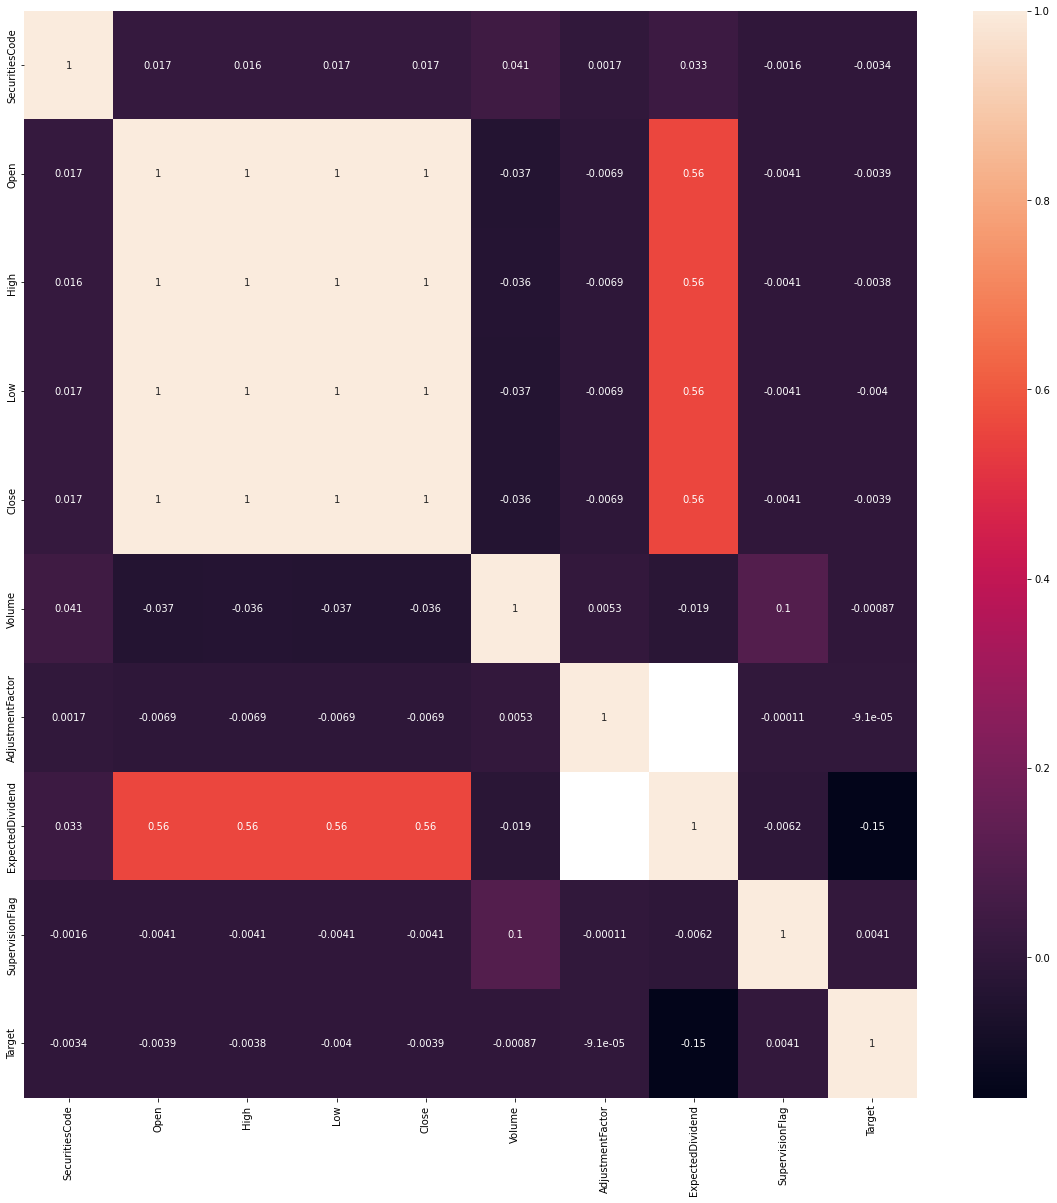

In [6]:
corr_matrix = train_stock_prices.corr()
sn.heatmap(corr_matrix,annot=True)
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

In [7]:
grouped_prices = train_stock_prices.groupby("SecuritiesCode")
for name,group in grouped_prices:
    group["Open"].fillna(method="ffill",inplace=True)
    group["Close"].fillna(method="ffill",inplace=True)
    group["Low"].fillna(method="ffill",inplace=True)
    group["High"].fillna(method="ffill",inplace=True)

/usr/lib/python3.10/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 4bfe3d07b4858144c219b9346329027024102ab6
python           : 3.10.5.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.18.2-arch1-1
Version          : #1 SMP PREEMPT_DYNAMIC Mon, 06 Jun 2022 19:58:58 +0000
machine          : x86_64
processor        : 
byteorder        : little
LC_ALL           : None
LANG             : C
LOCALE           : en_US.UTF-8

pandas           : 1.4.2
numpy            : 1.22.4
pytz             : 2022.1
dateutil         : 2.8.2
pip              : 21.0
setuptools       : 60.6.0
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.3.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : None
brotli           : None
